# Import Dataset

In [29]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [30]:
from urllib.request import urlretrieve

In [31]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f02c0573820>)

In [32]:
!pip install pandas ---quiet


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: ---quiet


In [33]:
import pandas as pd

In [34]:
medical_df = pd.read_csv('medical.csv')

In [35]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
#Dtypes
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
#statistics
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Exploration and Analysis

In [38]:
#exploratory analysis and visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#default style for  charts
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [40]:
##Age
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [41]:
#age
fig = px.histogram(medical_df,
                  x = 'age',
                  marginal = 'box',
                  nbins=47,
                  title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [42]:
##BMI
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()


In [43]:
#charges
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [44]:
#smoker
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [88]:
px.histogram(medical_df, 
                   x='smoker',
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Smoker')

In [46]:
#Age and Charges
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [47]:
##BMI relationship with charges
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [48]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
#children vs charges
px.violin(medical_df,
                  x='children', 
                  y='charges')

In [50]:
#CORRELATION
medical_df.charges.corr(medical_df.age)

0.29900819333064765

# BMI and Charges

In [51]:
medical_df.bmi.corr(medical_df.charges)

0.1983409688336289

In [52]:
medical_df.charges.corr(medical_df.children)


0.06799822684790487

In [53]:
##Getting dummies  for categorical variables
medical_df1 = pd.get_dummies(medical_df,  drop_first=True)

In [54]:
medical_df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [55]:
medical_df1.charges.corr(medical_df1.smoker_yes)

0.7872514304984772

In [56]:
 medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

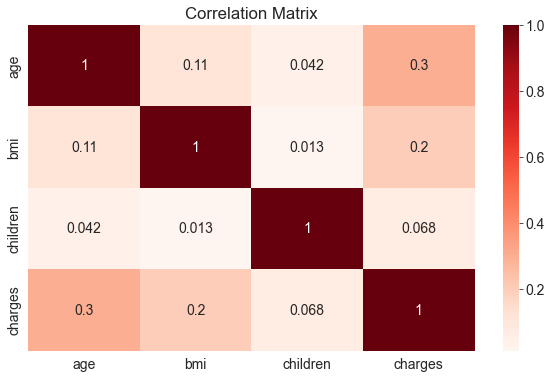

In [57]:
#correlation matrix
sns.heatmap(medical_df.corr(), cmap="Reds", annot=True)
plt.title('Correlation Matrix')

# Linear Regression Single Variable

In [58]:
#data frame with non-smokers only
non_smokers = medical_df[medical_df.smoker == 'no']

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

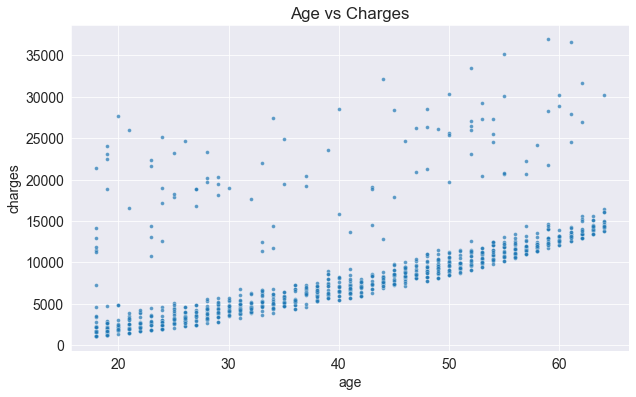

In [59]:
#visualization between age and charges 
plt.title('Age vs Charges')
sns.scatterplot(data=non_smokers, x='age', y='charges', alpha=0.7, s=15)

# Linear regression with Sci-Kit Learn

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [61]:
 #define and check shapeof inputs and targets
inputs = non_smokers[['age']]
targets = non_smokers.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [62]:
#fit linear regression model
model.fit(inputs, targets)

LinearRegression()

In [63]:
#try to predict charges for ages below
model.predict(np.array([[23],
                                               [37],
                                               [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [64]:
#predicction for all ages
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [65]:
#Root mean square error loss
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [66]:
rmse(targets, predictions)

4662.505766636391

In [67]:
#y = w*age + b
#w = coefficients, b = intercept

w = model.coef_
b = model.intercept_
print('w = ', w ,'and b = ', b)

w =  [267.24891283] and b =  -2091.4205565650827


In [68]:
def estimate_charges(age, w, b):
    return w * age + b

In [69]:
 def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges
    estimated_charges = estimate_charges(ages, w, b)
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

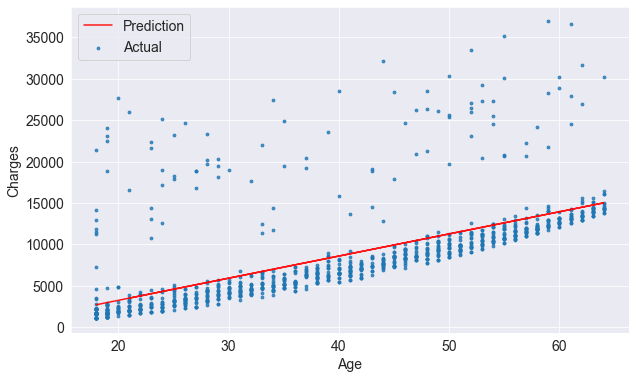

In [70]:
try_parameters(w, b)

# Smokers

In [71]:
smokers = medical_df[medical_df.smoker == 'yes']

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

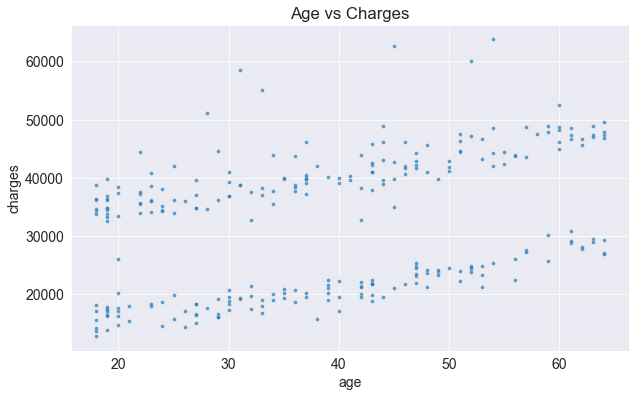

In [72]:
plt.title('Age vs Charges')
sns.scatterplot(data=smokers, x='age', y='charges', alpha=0.7, s=15)

In [73]:
 #define and check shapeof inputs and targets
inputs = smokers[['age']]
targets = smokers.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (274, 1)
targets.shape : (274,)


In [74]:
#fit linear regression model
model.fit(inputs, targets)

LinearRegression()

In [75]:
smokers.charges

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [76]:
#predicction for all ages for smokers
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [77]:
#Root mean square error loss
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [78]:
rmse(targets, predictions)

10711.00334810241

In [79]:
w = model.coef_
b = model.intercept_
print('w = ', w ,'and b = ', b)

w =  [305.23760211] and b =  20294.128126915966


In [80]:
def estimate_charges(age, w, b):
    return w * age + b

In [81]:
 def try_parameters(w, b):
    ages = smokers.age
    target = smokers.charges
    estimated_charges = estimate_charges(ages, w, b)
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

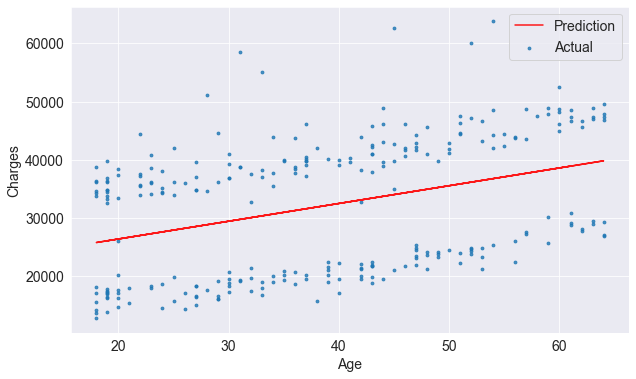

In [82]:
try_parameters(w, b)

# Linear Regression with multiple variables

In [83]:
#charges = w1*age + w2*bmi + b
#inputs and targets
inputs, targets = non_smokers[['age', 'bmi']], non_smokers['charges']

#Create and train the model 
model= LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#rsme loss
loss = rmse(targets, predictions)
print('Loss:', loss)



Loss: 4662.312835461298


In [84]:
#bmi correlation
non_smokers.charges.corr(non_smokers.bmi)

0.08403654312833272

In [85]:
#rel btwn the three
fig = px.scatter(non_smokers, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [86]:
#3d scatter plot
fig = px.scatter_3d(non_smokers, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [87]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

In [90]:
#adding last numeric column
#correlation btn charges and no of children 
non_smokers.charges.corr(non_smokers.children)

0.138928704535422

In [92]:
#visualization
fig = px.strip(non_smokers, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [93]:
#multiple variable regression
#charge = w1 * age + w2*bm1 + w3* children number
#define inputs and targets
inputs, targets = non_smokers[['age', 'bmi', 'children']], non_smokers['charges']

In [95]:
#create and train model
model = LinearRegression().fit(inputs, targets)

In [ ]:
#predict
predictions = model.predict(inputs)
predictions

In [98]:
#loss
loss = rmse(targets, predictions)
loss

4608.470405038245

In [100]:
#linear regression for all patients(smokers and non_smokers) using three numerical attributes
inputs, targets = medical_df [['age', 'bmi', 'children']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
loss

11355.317901125969

# Implementing Categorical attributes

In [101]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
#categorical values are already implemented using the dummies method
medical_df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [108]:
#create a linear regression to using  categorical attributes which are significantly correlated to the target
inputs, targets = medical_df1[['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']], medical_df1['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
predictions

array([25217.8974055 ,  3512.16575916,  6770.26275205, ...,
        4080.68637348,  1184.34832923, 37014.21805717])

In [109]:
loss = rmse(targets, predictions)
loss

6042.033215394105

# Improving the model

In [110]:
#feature scaling
model.coef_

array([  256.97358248,   338.66463761,   474.56646951, 23836.30050226,
        -352.18211218, -1034.36012742,  -959.37467355])

In [111]:
model.intercept_

-11990.269879646014

In [114]:
#visualizing different w of our model
input_cols= ['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.973582
1,bmi,338.664638
2,children,474.566470
3,smoker_yes,23836.300502
4,region_northwest,-352.182112
5,region_southeast,-1034.360127
6,region_southwest,-959.374674
7,1,-11990.269880


In [115]:
#standardization of numeric columns using scikit_learn
from sklearn.preprocessing import StandardScaler

In [116]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [117]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [118]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [119]:
#scaling
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [121]:
#combine with categorical data
medical_df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [123]:
cat_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
categorical_data = medical_df1[cat_cols].values

In [127]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

In [128]:
#perform a linear regression on the new values and compare 
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
loss

6041.679651174455